# Notebook to Plot Average Distance Map Given 

### Experimental

In [10]:
PDB_PATH = "/scratch/amk19/ChromVAE/ChromVAE/Data/chromosome21_aligned.pdb"
AVERAGE_DISTANCE_PATH = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Training_Set/average_distances.npy"
DISTANCE_OUTPUT = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Training_Set/distance_map.png"
RADIUS_OF_GYRATION_OUTPUT = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Training_Set/radius_of_gyration.png"
RADIUS_OF_GYRATION_DISTRIBUTION_OUTPUT = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Training_Set/radius_of_gyration_distribution.png"

### In Silico

In [1]:
PDB_PATH = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Generated_Samples/Large_Latent_Dim/Beta_0.0001/generated_samples_training_distribution.pdb"
MODEL_PATH = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/trained_vae_model_RMSD_64_Latent_Dim.pt"
AVERAGE_DISTANCE_PATH = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/average_distances.npy"
DISTANCE_OUTPUT = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/distance_map.png"
RADIUS_OF_GYRATION_OUTPUT = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/radius_of_gyration.png"
RADIUS_OF_GYRATION_DISTRIBUTION_OUTPUT = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/radius_of_gyration_distribution.png"
DISTRIBUTION_OUTPUT_1 = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/Distribution_of_Latent_Variable_1.png"
DISTRIBUTION_OUTPUT_2 = "/scratch/amk19/ChromVAE/ChromVAE/outputs/Large_Latent_Dim/Distribution_of_Latent_Variable_2.png"

# Load PDB

In [2]:
from Bio.PDB import PDBParser
import numpy as np

def load_pdb(pdb_path):
    """Load PDB file and return coordinates for each model."""
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('structure', pdb_path)
    
    all_coords = []
    for model in structure:
        coords = []
        for atom in model.get_atoms():
            coords.append(atom.get_coord())
        all_coords.append(np.array(coords))
    
    return all_coords

# Usage
coords_list = load_pdb(PDB_PATH)
print(f"Found {len(coords_list)} models")
print(f"First model has {len(coords_list[0])} atoms")

Found 10000 models
First model has 651 atoms


# Calculate Average Pairwise Distances

In [ ]:
import numpy as np
def compute_pairwise_distances(coords: np.ndarray) -> np.ndarray:
    """
    Compute pairwise distances between all atoms in a frame.
    Returns distance matrix of shape (N, N).
    """
    # Calculate all pairwise distances efficiently
    diff = coords[:, np.newaxis, :] - coords[np.newaxis, :, :]  # (N, N, 3)
    distances = np.sqrt(np.sum(diff**2, axis=2))  # (N, N)
    return distances

# Calculate distances for first model to get shape
distances = compute_pairwise_distances(coords_list[0])
total_distances = distances.copy()

# Add distances from remaining models
for coords in coords_list[1:]:
    total_distances += compute_pairwise_distances(coords)

# Average across all models
average_distances = total_distances / len(coords_list)

# Save
np.save(AVERAGE_DISTANCE_PATH, average_distances)
print("Done! Saved to average_distances.npy")


# Load Saved Average Distances

In [11]:
import numpy as np
# Load the saved average distances
average_distances = np.load(AVERAGE_DISTANCE_PATH)
print(f"Loaded distance matrix with shape: {average_distances.shape}")

Loaded distance matrix with shape: (651, 651)


# Plot Distance Map

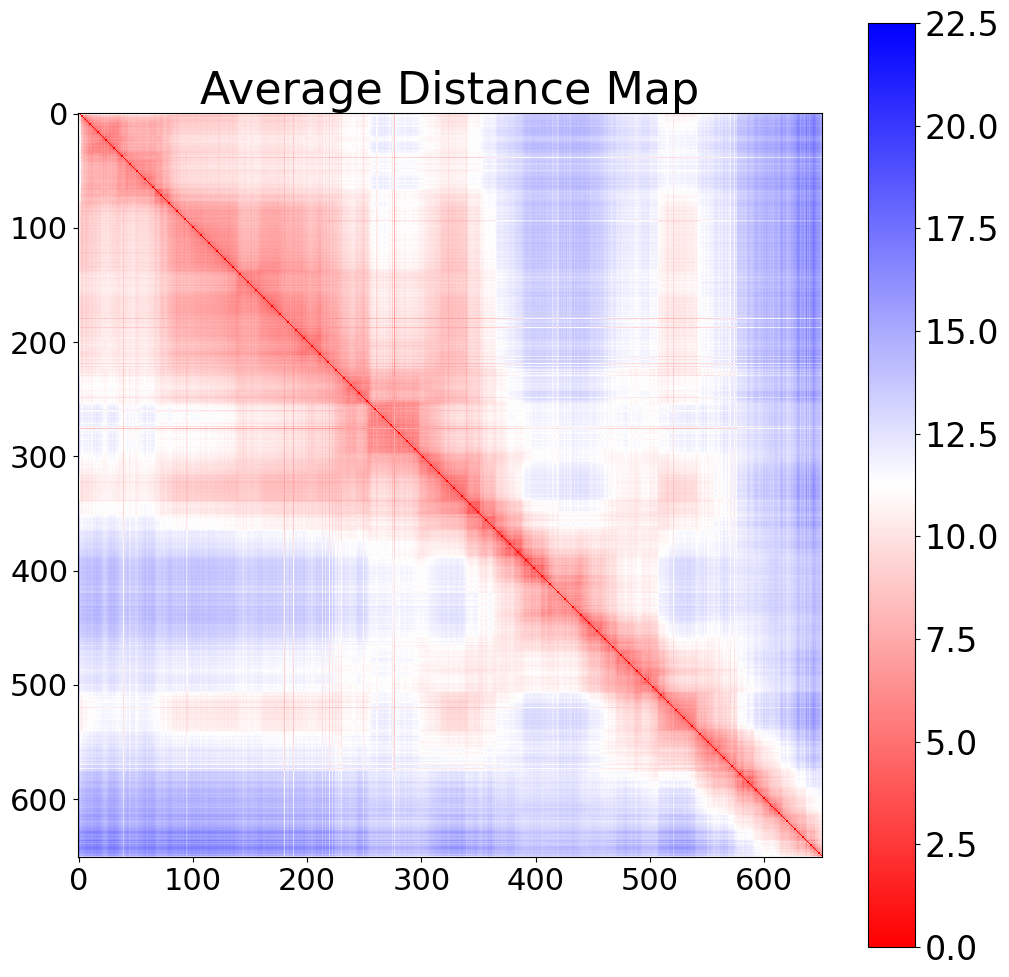

In [ ]:
import matplotlib.pyplot as plt
# Plot distance map with larger font sizes
plt.figure(figsize=(12, 12))
im = plt.imshow(average_distances, cmap='bwr_r', vmin=0, vmax=22.5, interpolation='none')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=24)  # Increase colorbar font size
plt.title('Average Distance Map', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

# Save Figure

In [12]:
plt.figure(figsize=(12, 12))
plt.imshow(average_distances, cmap='bwr_r', vmin=0, vmax=20)
plt.colorbar()
plt.title('Average Distance Map')
plt.savefig(DISTANCE_OUTPUT, dpi=300, bbox_inches='tight')
plt.close()


# Calculate Radius of Gyration for Each Structure

In [ ]:
import MDAnalysis as mda
import numpy as np

# Load your PDB file
u = mda.Universe(PDB_PATH)

# Calculate radius of gyration for each model
radii_of_gyration = []
for model in u.trajectory:
    Rg = u.atoms.radius_of_gyration()
    radii_of_gyration.append(Rg)

print(f"Calculated Rg for {len(radii_of_gyration)} models")
print(f"Mean Rg: {np.mean(radii_of_gyration):.3f}")

Calculated Rg for 7591 models
Mean Rg: 8.913


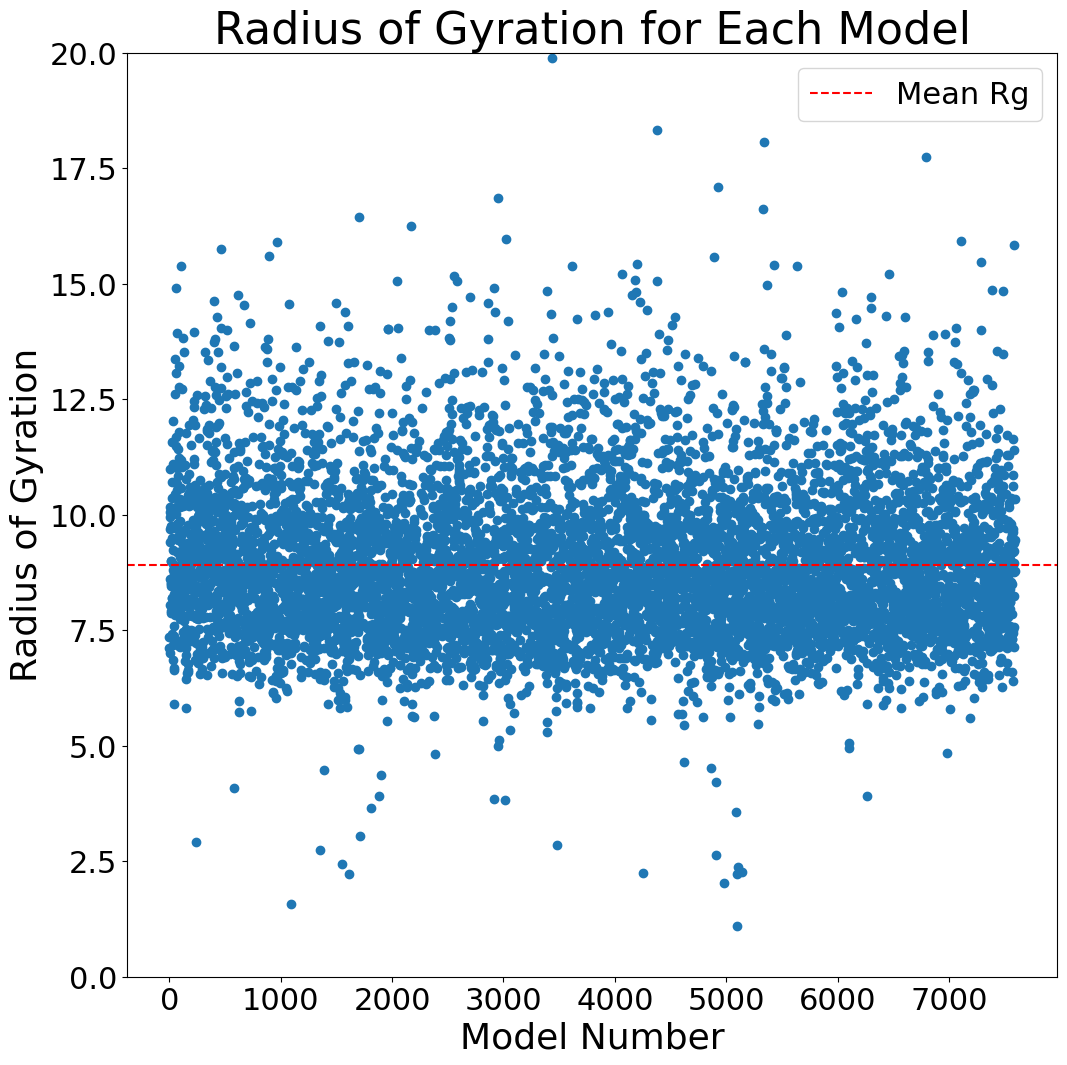

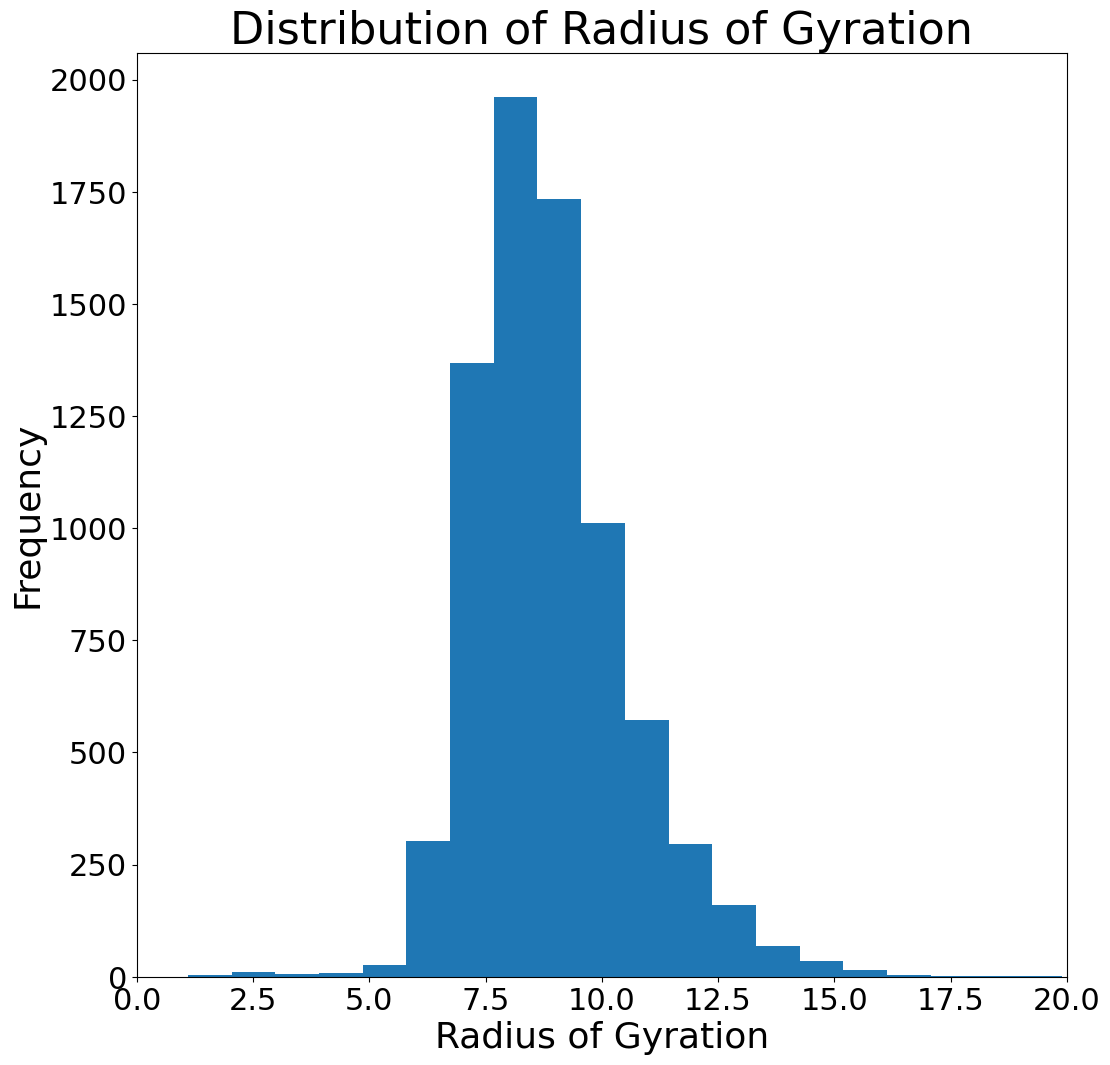

In [ ]:
import matplotlib.pyplot as plt

# Increase font sizes for all elements
title_fontsize = 32
label_fontsize = 26
tick_fontsize = 22
legend_fontsize = 22

plt.figure(figsize=(12, 12))
plt.scatter(range(len(radii_of_gyration)), radii_of_gyration)
plt.xlabel('Model Number', fontsize=label_fontsize)
plt.ylabel('Radius of Gyration', fontsize=label_fontsize)
plt.title('Radius of Gyration for Each Model', fontsize=title_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.ylim(0, 20)  # Manually set y-axis from 0 to 20
plt.axhline(y=np.mean(radii_of_gyration), color='r', linestyle='--', label='Mean Rg')
plt.legend(fontsize=legend_fontsize)
plt.savefig(RADIUS_OF_GYRATION_OUTPUT, dpi=300, bbox_inches='tight')


# Plot distribution of Rg with increased font sizes
plt.figure(figsize=(12, 12))
plt.hist(radii_of_gyration, bins=20)
plt.xlabel('Radius of Gyration', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.title('Distribution of Radius of Gyration', fontsize=title_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlim(0, 20)  # Manually set x-axis from 0 to 20
plt.savefig(RADIUS_OF_GYRATION_DISTRIBUTION_OUTPUT, dpi=300, bbox_inches='tight')

